          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0


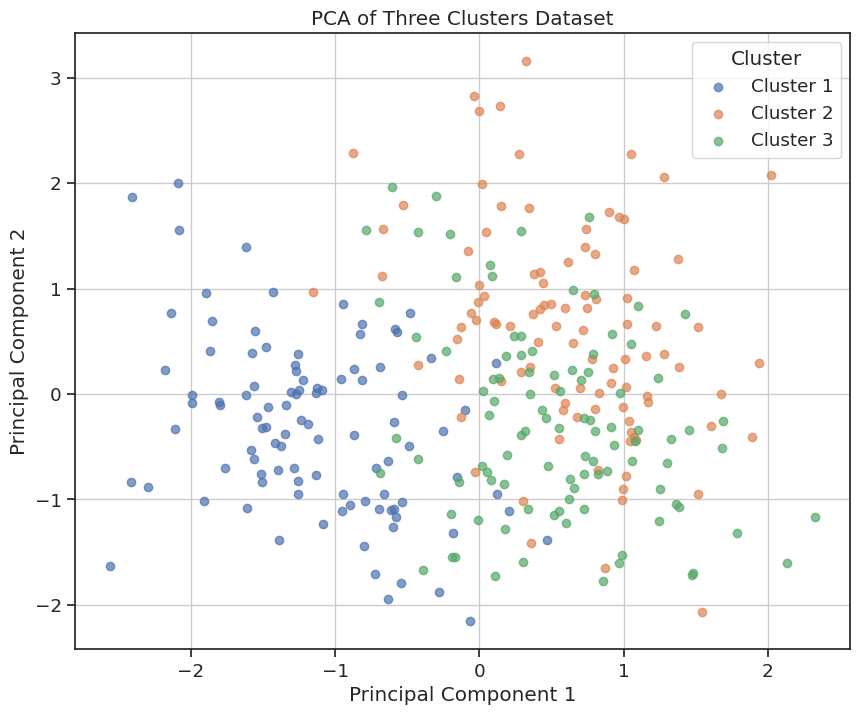

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# URL for the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/master/PCA_three_clusters_data.csv"

# Load data from CSV using the URL
df = pd.read_csv(url)
print(df.head())

# Extract features and class labels
X = df[['x', 'y', 'z']].values
y = df['class'].values

# Center and standardize the data before applying PCA
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA and reduce the data to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Define target names for clusters
target_names = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3"}

# Plot : PCA scatter plot (clusters colored)
plt.figure(figsize=(10, 8))
for i, target_name in target_names.items():
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Three Clusters Dataset")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


<ipython-input-37-8ceede2c4621>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 1], label=label, alpha=0.7, cmap='viridis')


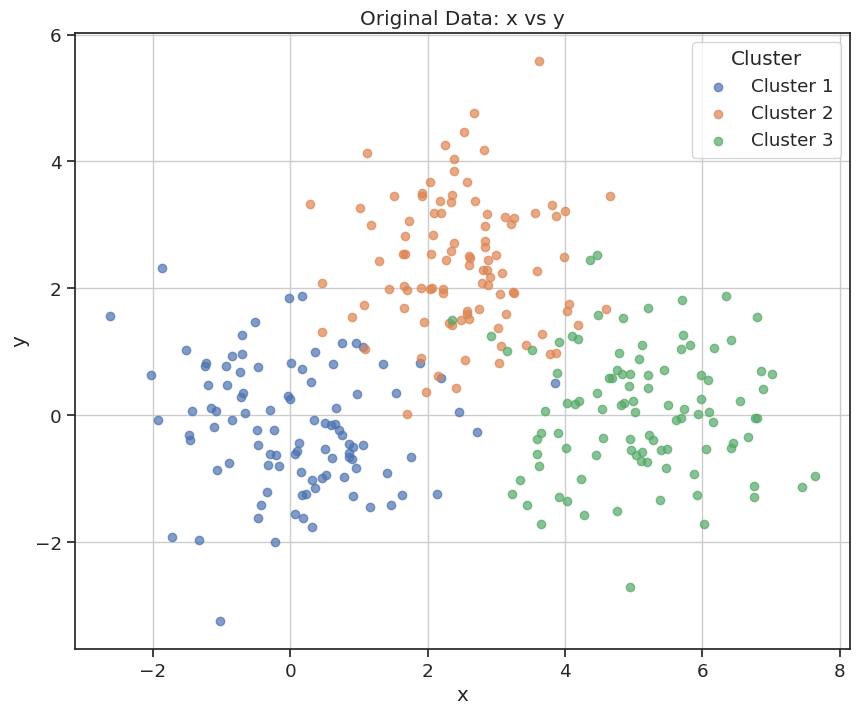

In [37]:
# Plot : Original data: x vs y
plt.figure(figsize=(10, 8))
for i, label in target_names.items():
    plt.scatter(X[y == i, 0], X[y == i, 1], label=label, alpha=0.7, cmap='viridis')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Original Data: x vs y")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()



<ipython-input-38-74297bb2767f>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 0], X[y == i, 2], label=label, alpha=0.7, cmap='viridis')


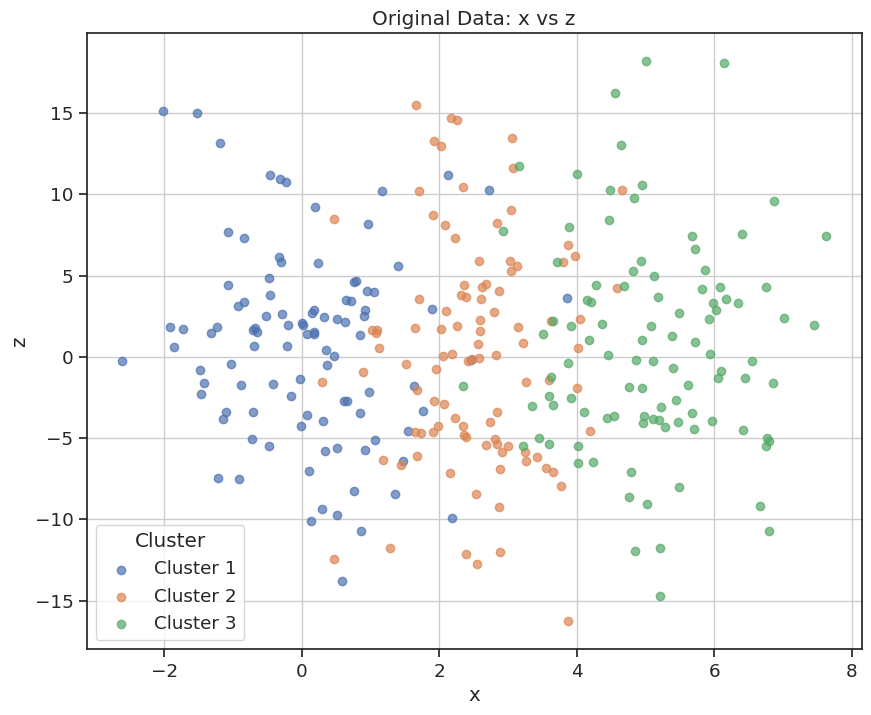

In [38]:
# Plot : Original data: x vs z
plt.figure(figsize=(10, 8))
for i, label in target_names.items():
    plt.scatter(X[y == i, 0], X[y == i, 2], label=label, alpha=0.7, cmap='viridis')
plt.xlabel("x")
plt.ylabel("z")
plt.title("Original Data: x vs z")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()



<ipython-input-39-7800ede41002>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i, 1], X[y == i, 2], label=label, alpha=0.7, cmap='viridis')


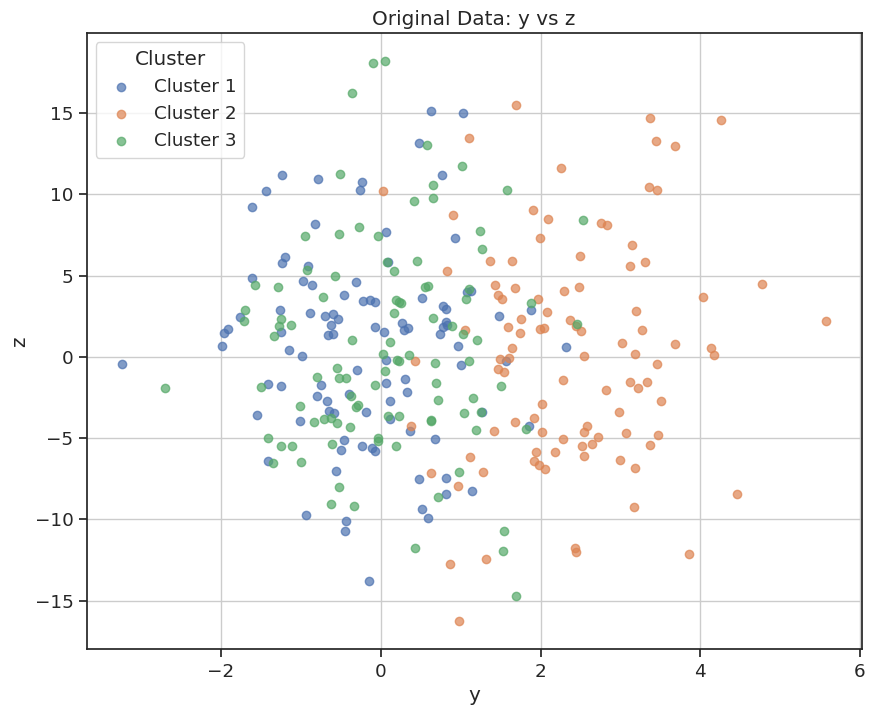

In [39]:
# Plot : Original data: y vs z
plt.figure(figsize=(10, 8))
for i, label in target_names.items():
    plt.scatter(X[y == i, 1], X[y == i, 2], label=label, alpha=0.7, cmap='viridis')
plt.xlabel("y")
plt.ylabel("z")
plt.title("Original Data: y vs z")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()



In [47]:
import seaborn as sns

# Compute and display the correlation matrix for the entire dataset
corr_all = df[['x', 'y', 'z']].corr()
print("Correlation matrix for the entire dataset:")
print(corr_all)
# Compute and visualize the correlation matrix for each cluster separately
clusters = sorted(df['class'].unique())
for cl in clusters:
    df_cl = df[df['class'] == cl]
    corr_cl = df_cl[['x', 'y', 'z']].corr()
    print(f"\nCorrelation matrix for cluster {cl + 1}:")
    print(corr_cl)


Correlation matrix for the entire dataset:
          x         y         z
x  1.000000  0.034832 -0.025644
y  0.034832  1.000000  0.003411
z -0.025644  0.003411  1.000000

Correlation matrix for cluster 1:
          x         y         z
x  1.000000 -0.123764 -0.120707
y -0.123764  1.000000 -0.048636
z -0.120707 -0.048636  1.000000

Correlation matrix for cluster 2:
          x         y         z
x  1.000000 -0.002553  0.005809
y -0.002553  1.000000  0.105834
z  0.005809  0.105834  1.000000

Correlation matrix for cluster 3:
          x         y         z
x  1.000000 -0.019240 -0.016346
y -0.019240  1.000000  0.038104
z -0.016346  0.038104  1.000000


## Analiza wykresów i PCA

----------

Na pierwszym wykresie (wykres składowych PCA) separacja nie jest zbyt wyraźna – widać, że klastry 2 i 3 nakładają się najbardziej.
Jeśli spojrzeć na rzut na oś pierwszej składowej, można zauważyć, że oddziela ona klaster 1, natomiast klastry 2 i 3 nadal nachodzą na siebie. Jeśli natomiast spojrzeć na rzut na oś drugiej składowej, widać, że nieco lepiej oddziela klastry 2 i 3, ale klastry 1 i 3 wciąż się pokrywają.

-----------

Na wykresie „Original data: x vs y” widoczna jest zależność między cechą x a y, tutaj separacja klastrów jest najlepsza. Oznacza to, że:
- wariancja wewnątrz klastrów jest niska,
- wariancja między klastrami jest wysoka,
- cecha x i cecha y są słabo skorelowane.

Stąd taka wyraźna separacja klastrów.  
Jeśli spojrzeć na rzut na oś x, widać, że ta cecha oddziela wszystkie trzy klastry, choć klaster 2 nieco nachodzi na klastry 1 i 3. Natomiast rzut na oś y pokazuje, że klastry 1 i 3 częściowo się pokrywają, ale cecha y oddziela klaster 2 od 1 i 3, co polepsza separację na wykresie x vs y.

--------

Na wykresie „Original data: x vs z” również widoczna jest dobra separacja klastrów, choć gorsza w porównaniu z poprzednim wykresem. Wynika to z faktu, że mimo:
- niskiej wariancji wewnątrz klastrów oraz
- wysokiej wariancji między klastrami,

Jeśli spojrzeć na rzut na oś z, okazuje się, że ta cecha praktycznie nie poprawia separacji klastrów.

-------------------

Na wykresie „Original data: y vs z” separacja klastrów jest bardzo niska – klastry 1 i 3 są praktycznie nierozróżnialne.

--------

## PCA

- Pierwsza główna składowa to kierunek w przestrzeni cech, wzdłuż którego dane mają maksymalną wariancję, czyli przy rzutowaniu danych na ten wektor, rozrzut rzutowanych wartości jest maksymalny z możliwych.  

- Po uzyskaniu pierwszej głównej składowej, druga główna składowa jest definiowana jako kierunek ortogonalny do pierwszej, który maksymalizuje wariancję danych w podprzestrzeni ortogonalnej do pierwszej składowej.

Oznacza to, że PCA szuka kierunków maksymalizujących wariancję, a nie maksymalizuje separacji klastrów.  
Struktura klastrowa danych jest głównie określana przez oś x (ponieważ na wykresach x vs y oraz x vs z widoczna jest najlepsza separacja klastrów), natomiast cechy y i z wnoszą mniejszą wariancję. Dlatego PCA, próbując "uchwycić" maksymalną ogólną wariancję, może wybrać kierunek, który nie odpowiada optymalnemu podziałowi klastrów.

W rezultacie projekcja PCA może być w tym sensie mniej użyteczna niż wykresy par cech, na których wyraźnie widoczna jest separacja klastrów.  
Przy kombinacji wszystkich trzech cech, PCA może uzyskać:
- pierwszy kierunek, dominujący ze względu na oś x,
- drugi kierunek (odpowiadający pozostałej wariancji), który może być mało  informacyjny z punktu widzenia separacji klastrów.

Czyli PCA nie zawsze poprawia separację, nawet jeśli oryginalne wykresy par cech już dobrze rozdzielają klastry. PCA maksymalizuje wariancję, więc jeśli kierunki wysokiej wariancji nie pokrywają się z kierunkami najlepiej separującymi klastry, PCA gorzej rozdziela klastry.

----------------------

## Standaryzacja danych
(Przekształcenie cech tak, aby miały średnią 0 i odchylenie standardowe 1)

Podczas obliczania PCA liczymy macierz kowariancji cech.
Jeśli jedna cecha ma znacznie większą skalę niż inna, jej wariancja zdominuje macierz kowariancji, co oznacza, że ta cecha będzie miała większy wpływ na wyniki, niezależnie od jej rzeczywistego wpływu na strukturę danych.
Standaryzacja danych zapewnia, że cechy stają się porównywalne, ponieważ mają tę samą skalę i wnoszą równy wkład do analizy.
Bez standaryzacji główne składowe mogą być skierowane w stronę cech o najwyższych wariancjach (które bez standaryzacji zależą od skali), co prowadzi do błędnych interpretacji.
Dzięki standaryzacji wyniki PCA odzwierciedlają rzeczywistą strukturę danych, eliminując wpływ różnic skal pomiarowych.

